<a href="https://colab.research.google.com/github/LIMDANBI/2021-2/blob/main/AI%2BX/diabetes/kfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 검증

In [1]:
import pandas as pd

data_path = '/content/drive/MyDrive/ ai+x/titanic.xls'
titanic = pd.read_excel(data_path)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [3]:
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   int64  
 1   survived   1045 non-null   int64  
 2   name       1045 non-null   object 
 3   sex        1045 non-null   object 
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   int64  
 6   parch      1045 non-null   int64  
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
 14  gender     1045 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 130.6+ KB


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']].values
y = titanic['survived'].values

SS = StandardScaler()
SS.fit(X)

X_ss = SS.transform(X)

X_train, X_test, y_train, y_test = \
train_test_split(X_ss, y, test_size = 0.2, random_state = 13)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

log_reg_kf = LogisticRegression(random_state = 13, solver = 'liblinear')
kfold = KFold(n_splits = 5)
cv_accuracy = []

In [6]:
from sklearn.metrics import accuracy_score

for train_idx, test_idx in kfold.split(X_ss):
    X_train, X_test = X_ss[train_idx], X_ss[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    log_reg_kf.fit(X_train, y_train)

    pred = log_reg_kf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)

    cv_accuracy.append(accuracy)

In [7]:
cv_accuracy

[0.7655502392344498,
 0.8660287081339713,
 0.8229665071770335,
 0.7464114832535885,
 0.7081339712918661]

In [8]:
import numpy as np

np.mean(cv_accuracy)

0.7818181818181819

In [9]:
for train_idx, test_idx in kfold.split(X_ss):
    X_train, X_test = X_ss[train_idx], X_ss[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    print(np.unique(y_test, return_counts = True))

(array([0, 1]), array([ 74, 135]))
(array([0, 1]), array([107, 102]))
(array([0, 1]), array([125,  84]))
(array([0, 1]), array([155,  54]))
(array([0, 1]), array([157,  52]))


In [10]:
from sklearn.model_selection import StratifiedKFold

log_reg_kf = LogisticRegression(random_state = 13, solver = 'liblinear')
skfold = StratifiedKFold(n_splits = 5)
cv_accuracy = []

In [11]:
for train_idx, test_idx in skfold.split(X_ss, y):
    X_train, X_test = X_ss[train_idx], X_ss[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    print(np.unique(y_test, return_counts = True))

(array([0, 1]), array([123,  86]))
(array([0, 1]), array([123,  86]))
(array([0, 1]), array([124,  85]))
(array([0, 1]), array([124,  85]))
(array([0, 1]), array([124,  85]))


In [12]:
for train_idx, test_idx in skfold.split(X_ss, y):
    X_train, X_test = X_ss[train_idx], X_ss[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    log_reg_kf.fit(X_train, y_train)

    pred = log_reg_kf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)

    cv_accuracy.append(accuracy)

In [13]:
cv_accuracy

[0.569377990430622,
 0.861244019138756,
 0.8133971291866029,
 0.7368421052631579,
 0.6555023923444976]

In [14]:
np.mean(cv_accuracy)

0.7272727272727273

In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg_kf, X_ss, y, scoring = 'accuracy', cv = 5)

In [16]:
scores

array([0.56937799, 0.86124402, 0.81339713, 0.73684211, 0.65550239])

In [17]:
np.mean(scores)

0.7272727272727273

# 하이퍼 파라미터 튜닝

In [18]:
X_train, X_test, y_train, y_test = \
train_test_split(X_ss, y, test_size = 0.2, random_state = 13)

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 2, random_state = 13)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.7559808612440191


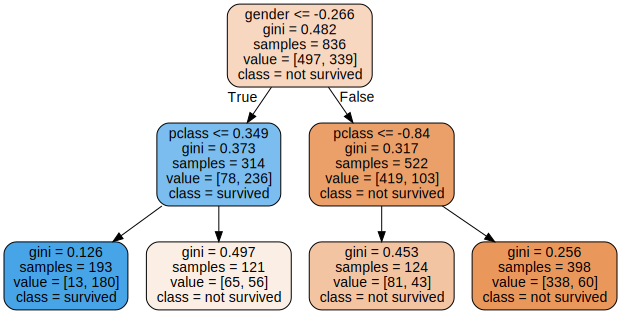

In [19]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(dt, feature_names = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender'],
                       class_names = ['not survived', 'survived'],
                       rounded = True, filled = True))

In [20]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 4, 5], 'min_samples_split':[2, 3, 4]}
grid_clf = GridSearchCV(dt, param_grid = parameters, cv = 3)

In [21]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4]})

In [22]:
scores_df = pd.DataFrame(grid_clf.cv_results_)
scores_df[['rank_test_score', 'params', 'mean_test_score', 'split0_test_score',
           'split1_test_score', 'split2_test_score']]

,rank_test_score,params,mean_test_score,split0_test_score,split1_test_score,split2_test_score
0,10,"{'max_depth': 2, 'min_samples_split': 2}",0.788286,0.788530,0.781362,0.794964
1,10,"{'max_depth': 2, 'min_samples_split': 3}",0.788286,0.788530,0.781362,0.794964
2,10,"{'max_depth': 2, 'min_samples_split': 4}",0.788286,0.788530,0.781362,0.794964
3,4,"{'max_depth': 3, 'min_samples_split': 2}",0.795467,0.774194,0.806452,0.805755
4,4,"{'max_depth': 3, 'min_samples_split': 3}",0.795467,0.774194,0.806452,0.805755
5,4,"{'max_depth': 3, 'min_samples_split': 4}",0.795467,0.774194,0.806452,0.805755
6,1,"{'max_depth': 4, 'min_samples_split': 2}",0.803830,0.795699,0.810036,0.805755
7,1,"{'max_depth': 4, 'min_samples_split': 3}",0.803830,0.795699,0.810036,0.805755
8,1,"{'max_depth': 4, 'min_samples_split': 4}",0.803830,0.795699,0.810036,0.805755
9,9,"{'max_depth': 5, 'min_samples_split': 2}",0.791878,0.774194,0.799283,0.802158


In [23]:
grid_clf.best_params_

{'max_depth': 4, 'min_samples_split': 2}

In [24]:
grid_clf.best_score_

0.8038300542361809

In [25]:
clf_best = grid_clf.best_estimator_

pred = clf_best.predict(X_test)
accuracy_score(y_test, pred)

0.7655502392344498